<a href="https://colab.research.google.com/github/Lvisbal/Rendimiento-Simple-y-Logaritmico/blob/main/Bandas_de_Bollinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bandas de Bollinger**

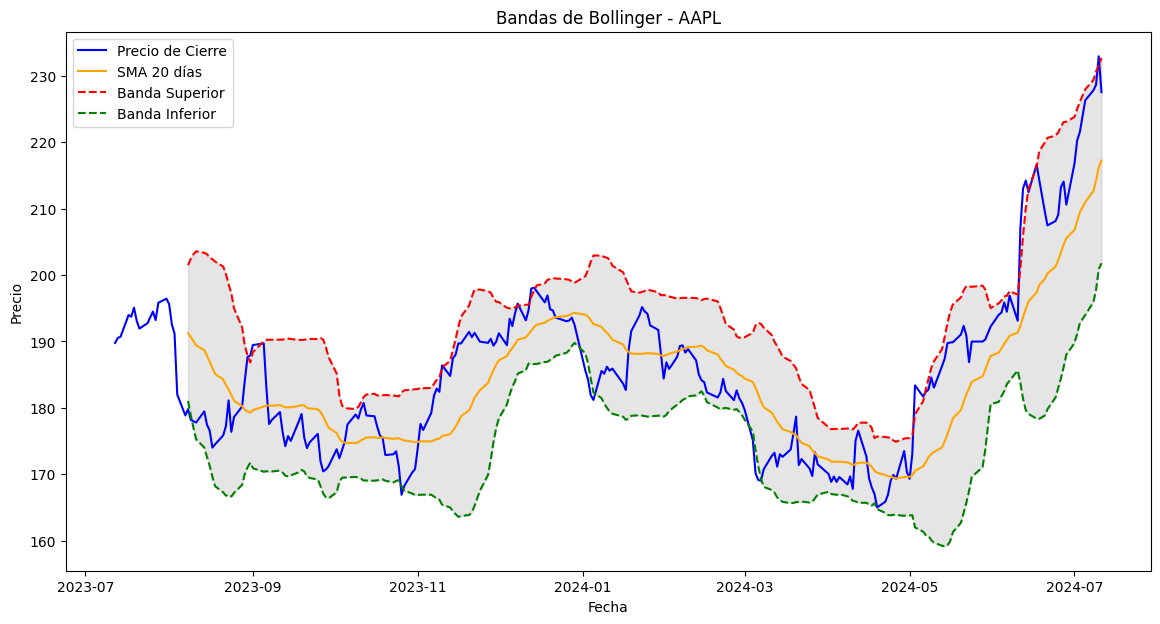

Las Bandas de Bollinger son un indicador técnico utilizado en análisis financiero para medir la volatilidad de un activo y para determinar niveles potenciales de sobrecompra o sobreventa. Fueron desarrolladas por John Bollinger en la década de 1980 y se basan en la idea de que los precios tienden a fluctuar dentro de ciertos límites definidos por desviaciones estándar.

**Componentes del Indicador**

**Media Móvil Simple (SMA):** Las Bandas de Bollinger se construyen alrededor de una media móvil simple de los precios de cierre durante un período específico. La SMA se calcula sumando los precios de cierre de un número determinado de períodos y luego dividiendo ese total por el número de períodos.

**Desviación Estándar**: Este es el factor clave que determina la amplitud de las bandas.

**Bandas Superiores e Inferiores:** Las bandas se crean trazando dos desviaciones estándar por encima y por debajo de la SMA. La fórmula general para las Bandas de Bollinger es:


*   Banda Superior = SMA + (Desviación Estándar * Factor)
*   Banda Inferior = SMA - (Desviación Estándar * Factor)
(   Donde el "Factor" suele ser 2, pero puede ajustarse según la volatilidad del mercado)

**Interpretación**

**Volatilidad:** Las bandas se expanden cuando la volatilidad aumenta y se contraen cuando la volatilidad disminuye. Esto proporciona una visualización gráfica de la volatilidad relativa del activo en un período determinado.

**Sobrecompra y Sobreventa:** Se considera que un activo está sobrecomprado cuando el precio está cerca de la banda superior y sobrevendido cuando está cerca de la banda inferior. Esto puede indicar oportunidades para entrar o salir del mercado, dependiendo de la dirección de la tendencia y otros indicadores.

**Señales de Trading**

**Rebote desde las Bandas:** Cuando el precio rebota desde una banda hacia la SMA, puede sugerir un cambio en la dirección del precio.

**Cruce de las Bandas: **Cuando el precio cruza una banda, especialmente en combinación con otros indicadores técnicos, puede señalar cambios significativos en la dirección del precio.

**Divergencias:** Si el precio hace máximos más altos o mínimos más bajos mientras que las Bandas de Bollinger muestran máximos más bajos o mínimos más altos, puede indicar una divergencia potencial y una posible inversión de la tendencia.

**Aplicacion en mercados financieros**

Las Bandas de Bollinger se utilizan en una variedad de mercados financieros, incluyendo acciones, divisas, futuros y criptomonedas. Su popularidad se debe a su capacidad para proporcionar una evaluación visual rápida de la volatilidad y las condiciones de sobrecompra o sobreventa. Los traders pueden usar las Bandas de Bollinger junto con otros indicadores técnicos y análisis fundamental para tomar decisiones informadas sobre sus operaciones.
En resumen, las Bandas de Bollinger son una herramienta versátil en el análisis técnico que ayuda a los traders a identificar tendencias, niveles de soporte y resistencia, así como oportunidades potenciales de entrada y salida del mercado basadas en la volatilidad y los movimientos de precio históricos. Su interpretación requiere práctica y experiencia para integrarlas efectivamente en una estrategia de trading completa.


In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Descargar datos de AAPL desde Yahoo Finance
ticker = 'AAPL'
start_date = '2023-07-12'
end_date = '2024-07-12'

data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [17]:
# Calcular la media móvil de 20 días y la desviación estándar
data['SMA'] = data['Close'].rolling(window=20).mean()
data['STD'] = data['Close'].rolling(window=20).std()

# Calcular las bandas de Bollinger
data['Upper'] = data['SMA'] + 2 * data['STD']
data['Lower'] = data['SMA'] - 2 * data['STD']


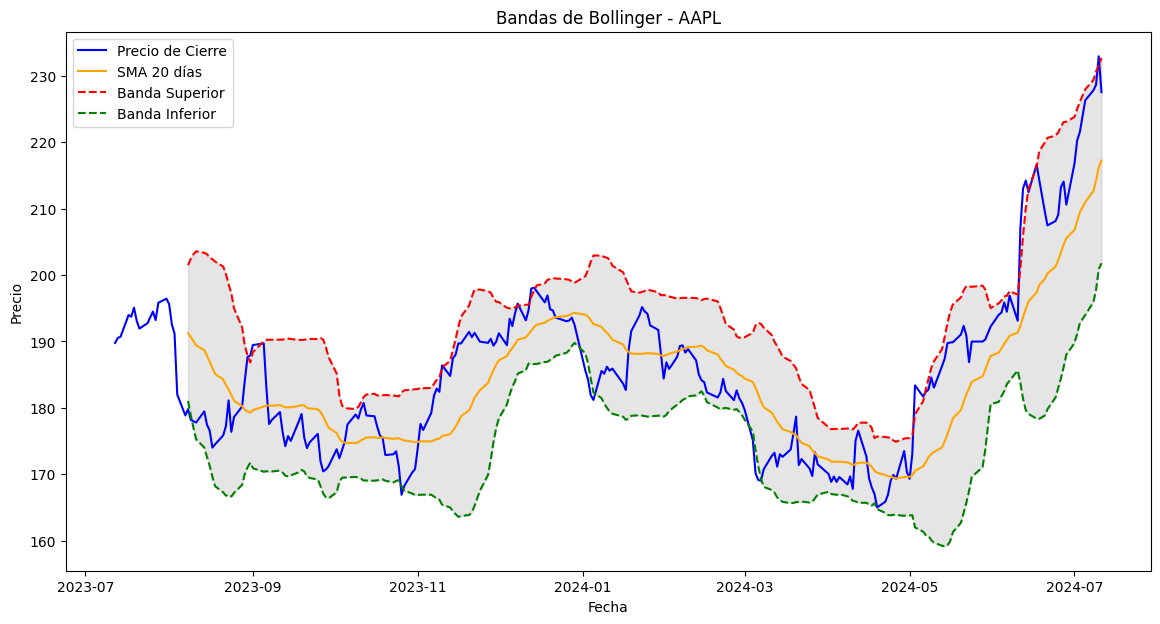

In [19]:
# Crear el gráfico
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Precio de Cierre', color='blue')
plt.plot(data['SMA'], label='SMA 20 días', color='orange')
plt.plot(data['Upper'], label='Banda Superior', color='red', linestyle='--')
plt.plot(data['Lower'], label='Banda Inferior', color='green', linestyle='--')
plt.fill_between(data.index, data['Lower'], data['Upper'], color='gray', alpha=0.2)  # Rellenar el espacio entre las bandas

# Añadir detalles al gráfico
plt.title('Bandas de Bollinger - AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# Mostrar el gráfico
plt.show()
